# University project: 

# Data-Driven_E-Charging_Station_Optimization :

In this notebook , we're going through a project with the goal of predicting the price(dynamic pricing ) and improve customer satisfaction of E-charging stations.

# 1. Problem definition :
The E-Charging Operators (equivalent of today’s 
petrol pump operators) need a Big Data approach to 
ensure their customers (end-users) satisfaction and 
optimum utilization of the e-Charging stations. The 
operator may have fast or slow charging 
infrastructure with their own payment terms and 
timings. Based on a data-centric approach the 
operator can offer dynamic pricing at stipulated 
times and manage the peak demand acco

# 2. Data :

*  The data is downloaded https://www.kaggle.com/datasets/venkatsairo4899/ev-charging-station-usage-of-california-city_format 
*  Terms and co/copyrightsndihttps://www.usa.gov/government-copyright_stations_format

# 3. EDA(Exploratory data analysis): 

In [1]:
# importing  necessary libraries for eda
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import panel as pn 
pn.extension("tabulator")
import hvplot.pandas

%matplotlib inline

### Load data

In [2]:
df = pd.read_csv("EVChargingStationUsage.csv", low_memory=False)
df

,Station Name,MAC Address,Org Name,Start Date,Start Time Zone,End Date,End Time Zone,Transaction Date (Pacific Time),Total Duration (hh:mm:ss),Charging Time (hh:mm:ss),...,Longitude,Currency,Fee,Ended By,Plug In Event Id,Driver Postal Code,User ID,County,System S/N,Model Number
0,PALO ALTO CA / HAMILTON #1,000D:6F00:015A:9D76,City of Palo Alto,7/29/2011 20:17,PDT,7/29/2011 23:20,PDT,7/29/2011 23:20,3:03:32,1:54:03,...,-122.160309,USD,0.00,Plug Out at Vehicle,3,95124.0,3284,NaN,NaN,NaN
1,PALO ALTO CA / HAMILTON #1,000D:6F00:015A:9D76,City of Palo Alto,7/30/2011 0:00,PDT,7/30/2011 0:02,PDT,7/30/2011 0:02,0:02:06,0:01:54,...,-122.160309,USD,0.00,Customer,4,94301.0,4169,NaN,NaN,NaN
2,PALO ALTO CA / HAMILTON #1,000D:6F00:015A:9D76,City of Palo Alto,7/30/2011 8:16,PDT,7/30/2011 12:34,PDT,7/30/2011 12:34,4:17:32,4:17:28,...,-122.160309,USD,0.00,Plug Out at Vehicle,5,94301.0,4169,NaN,NaN,NaN
3,PALO ALTO CA / HAMILTON #1,000D:6F00:015A:9D76,City of Palo Alto,7/30/2011 14:51,PDT,7/30/2011 16:55,PDT,7/30/2011 16:55,2:03:24,2:02:58,...,-122.160309,USD,0.00,Customer,6,94302.0,2545,NaN,NaN,NaN
4,PALO ALTO CA / HAMILTON #1,000D:6F00:015A:9D76,City of Palo Alto,7/30/2011 18:51,PDT,7/30/2011 20:03,PDT,7/30/2011 20:03,1:11:24,0:43:54,...,-122.160309,USD,0.00,Plug Out at Vehicle,7,94043.0,3765,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259410,PALO ALTO CA / TED THOMPSON #3,0024:B100:0002:9F81,City of Palo Alto,12/31/2020 16:39,PST,12/31/2020 17:14,PST,12/31/2020 17:16,0:35:44,0:35:18,...,-122.144043,USD,0.42,Plug Out at Vehicle,2369,94301.0,2024201,NaN,1.745410e+11,CT4020-HD-GW
259411,PALO ALTO CA / WEBSTER #1,0024:B100:0002:4233,City of Palo Alto,12/31/2020 16:48,PST,12/31/2020 20:31,PST,12/31/2020 20:32,3:43:01,2:14:04,...,-122.158272,USD,4.69,Plug Out at Vehicle,7255,94541.0,242661,Santa Clara County,1.336410e+11,CT4020-HD-GW
259412,PALO ALTO CA / MPL #4,0024:B100:0003:CD37,City of Palo Alto,12/31/2020 17:28,PST,1/1/2021 10:56,PST,1/1/2021 10:57,17:28:14,5:08:12,...,-122.113510,USD,6.82,Plug Out at Vehicle,455,94306.0,449995,Santa Clara County,2.002410e+11,CT4010-HD-GW
259413,PALO ALTO CA / WEBSTER #1,0024:B100:0002:4233,City of Palo Alto,12/31/2020 17:49,PST,12/31/2020 21:55,PST,12/31/2020 21:56,4:05:34,3:53:42,...,-122.158272,USD,2.75,Plug Out at Vehicle,7256,94552.0,804075,Santa Clara County,1.336410e+11,CT4020-HD-GW


In [3]:
df.describe()

,Energy (kWh),GHG Savings (kg),Gasoline Savings (gallons),Port Number,EVSE ID,Postal Code,Latitude,Longitude,Fee,Plug In Event Id,Driver Postal Code,System S/N
count,259415.000000,259415.000000,259415.000000,259415.000000,1.804670e+05,259415.000000,259415.000000,259415.000000,259415.000000,2.594150e+05,251013.000000,1.804670e+05
mean,8.544277,3.588596,1.072306,1.591627,1.462973e+05,94302.315768,37.439565,-122.151264,1.097481,1.188685e+08,94170.308255,1.443790e+11
std,7.185462,3.017894,0.901776,0.491534,2.429677e+05,1.941657,0.009621,0.015382,1.934408,4.057750e+08,4249.837126,2.483280e+10
min,0.010000,0.004000,0.001000,1.000000,3.792000e+03,94301.000000,37.422104,-122.163239,0.000000,1.000000e+00,1013.000000,1.023100e+11
25%,3.784000,1.589000,0.475000,1.000000,4.358300e+04,94301.000000,37.428318,-122.162170,0.000000,1.573000e+03,94087.000000,1.231100e+11
50%,6.868634,2.885000,0.862000,2.000000,1.074270e+05,94301.000000,37.444489,-122.158272,0.000000,3.573000e+03,94304.000000,1.427410e+11
75%,11.458340,4.813000,1.438000,2.000000,1.745590e+05,94303.000000,37.446613,-122.145699,1.640000,6.340000e+03,94804.000000,1.705410e+11
max,97.360000,40.891000,12.219000,2.000000,5.535441e+06,94306.000000,37.449375,-122.112480,84.560000,1.609436e+09,99354.000000,2.002410e+11


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 259415 entries, 0 to 259414
Data columns (total 33 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   Station Name                     259415 non-null  object 
 1   MAC Address                      259415 non-null  object 
 2   Org Name                         259415 non-null  object 
 3   Start Date                       259415 non-null  object 
 4   Start Time Zone                  259415 non-null  object 
 5   End Date                         259415 non-null  object 
 6   End Time Zone                    259415 non-null  object 
 7   Transaction Date (Pacific Time)  259206 non-null  object 
 8   Total Duration (hh:mm:ss)        259415 non-null  object 
 9   Charging Time (hh:mm:ss)         259415 non-null  object 
 10  Energy (kWh)                     259415 non-null  float64
 11  GHG Savings (kg)                 259415 non-null  float64
 12  Ga

In [5]:
df["Fee"].value_counts()

Fee
0.00     133538
1.40        633
1.42        605
1.43        591
1.39        574
          ...  
19.64         1
20.65         1
19.38         1
19.00         1
47.51         1
Name: count, Length: 1817, dtype: int64

In [6]:
df.head().T

,0,1,2,3,4
Station Name,PALO ALTO CA / HAMILTON #1,PALO ALTO CA / HAMILTON #1,PALO ALTO CA / HAMILTON #1,PALO ALTO CA / HAMILTON #1,PALO ALTO CA / HAMILTON #1
MAC Address,000D:6F00:015A:9D76,000D:6F00:015A:9D76,000D:6F00:015A:9D76,000D:6F00:015A:9D76,000D:6F00:015A:9D76
Org Name,City of Palo Alto,City of Palo Alto,City of Palo Alto,City of Palo Alto,City of Palo Alto
Start Date,7/29/2011 20:17,7/30/2011 0:00,7/30/2011 8:16,7/30/2011 14:51,7/30/2011 18:51
Start Time Zone,PDT,PDT,PDT,PDT,PDT
End Date,7/29/2011 23:20,7/30/2011 0:02,7/30/2011 12:34,7/30/2011 16:55,7/30/2011 20:03
End Time Zone,PDT,PDT,PDT,PDT,PDT
Transaction Date (Pacific Time),7/29/2011 23:20,7/30/2011 0:02,7/30/2011 12:34,7/30/2011 16:55,7/30/2011 20:03
Total Duration (hh:mm:ss),3:03:32,0:02:06,4:17:32,2:03:24,1:11:24
Charging Time (hh:mm:ss),1:54:03,0:01:54,4:17:28,2:02:58,0:43:54


In [7]:
df["Model Number"].value_counts()

Model Number
CT4020-HD-GW          84886
CT4020-HD             45129
CT2100-HD-CDMA-CCR    11377
CT2000-HD-CCR         10052
CT2100-HD-CCR          8012
CT2000-HD-GW1-CCR      5737
CTHDR-S                4134
CTHCR-S                3941
CTHDR                  3623
CT4010-HD-GW           3576
Name: count, dtype: int64

In [8]:
df.isna().sum()

Station Name                           0
MAC Address                            0
Org Name                               0
Start Date                             0
Start Time Zone                        0
End Date                               0
End Time Zone                          0
Transaction Date (Pacific Time)      209
Total Duration (hh:mm:ss)              0
Charging Time (hh:mm:ss)               0
Energy (kWh)                           0
GHG Savings (kg)                       0
Gasoline Savings (gallons)             0
Port Type                              9
Port Number                            0
Plug Type                              0
EVSE ID                            78948
Address 1                              0
City                                   0
State/Province                         0
Postal Code                            0
Country                                0
Latitude                               0
Longitude                              0
Currency        

In [9]:
df.isnull().sum()


Station Name                           0
MAC Address                            0
Org Name                               0
Start Date                             0
Start Time Zone                        0
End Date                               0
End Time Zone                          0
Transaction Date (Pacific Time)      209
Total Duration (hh:mm:ss)              0
Charging Time (hh:mm:ss)               0
Energy (kWh)                           0
GHG Savings (kg)                       0
Gasoline Savings (gallons)             0
Port Type                              9
Port Number                            0
Plug Type                              0
EVSE ID                            78948
Address 1                              0
City                                   0
State/Province                         0
Postal Code                            0
Country                                0
Latitude                               0
Longitude                              0
Currency        

In [10]:
df["System S/N"].value_counts()

System S/N
1.427410e+11    11387
1.640410e+11     9478
1.739410e+11     7913
1.742410e+11     7499
1.707410e+11     6801
                ...  
1.923410e+11       29
1.642410e+11       27
2.002410e+11       14
1.922410e+11        9
1.921410e+11        1
Name: count, Length: 81, dtype: int64

In [11]:
df["County"].value_counts()

County
Santa Clara County    147263
San Mateo County       27487
Name: count, dtype: int64

In [12]:
# Drop unnecessary columns
df.drop(['EVSE ID', 'County', 'System S/N', 'Model Number'], axis=1, inplace=True)


In [13]:
df.head().T

,0,1,2,3,4
Station Name,PALO ALTO CA / HAMILTON #1,PALO ALTO CA / HAMILTON #1,PALO ALTO CA / HAMILTON #1,PALO ALTO CA / HAMILTON #1,PALO ALTO CA / HAMILTON #1
MAC Address,000D:6F00:015A:9D76,000D:6F00:015A:9D76,000D:6F00:015A:9D76,000D:6F00:015A:9D76,000D:6F00:015A:9D76
Org Name,City of Palo Alto,City of Palo Alto,City of Palo Alto,City of Palo Alto,City of Palo Alto
Start Date,7/29/2011 20:17,7/30/2011 0:00,7/30/2011 8:16,7/30/2011 14:51,7/30/2011 18:51
Start Time Zone,PDT,PDT,PDT,PDT,PDT
End Date,7/29/2011 23:20,7/30/2011 0:02,7/30/2011 12:34,7/30/2011 16:55,7/30/2011 20:03
End Time Zone,PDT,PDT,PDT,PDT,PDT
Transaction Date (Pacific Time),7/29/2011 23:20,7/30/2011 0:02,7/30/2011 12:34,7/30/2011 16:55,7/30/2011 20:03
Total Duration (hh:mm:ss),3:03:32,0:02:06,4:17:32,2:03:24,1:11:24
Charging Time (hh:mm:ss),1:54:03,0:01:54,4:17:28,2:02:58,0:43:54


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 259415 entries, 0 to 259414
Data columns (total 29 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   Station Name                     259415 non-null  object 
 1   MAC Address                      259415 non-null  object 
 2   Org Name                         259415 non-null  object 
 3   Start Date                       259415 non-null  object 
 4   Start Time Zone                  259415 non-null  object 
 5   End Date                         259415 non-null  object 
 6   End Time Zone                    259415 non-null  object 
 7   Transaction Date (Pacific Time)  259206 non-null  object 
 8   Total Duration (hh:mm:ss)        259415 non-null  object 
 9   Charging Time (hh:mm:ss)         259415 non-null  object 
 10  Energy (kWh)                     259415 non-null  float64
 11  GHG Savings (kg)                 259415 non-null  float64
 12  Ga

In [15]:
# Check for and remove duplicates
df.drop_duplicates(inplace=True)


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 259411 entries, 0 to 259414
Data columns (total 29 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   Station Name                     259411 non-null  object 
 1   MAC Address                      259411 non-null  object 
 2   Org Name                         259411 non-null  object 
 3   Start Date                       259411 non-null  object 
 4   Start Time Zone                  259411 non-null  object 
 5   End Date                         259411 non-null  object 
 6   End Time Zone                    259411 non-null  object 
 7   Transaction Date (Pacific Time)  259202 non-null  object 
 8   Total Duration (hh:mm:ss)        259411 non-null  object 
 9   Charging Time (hh:mm:ss)         259411 non-null  object 
 10  Energy (kWh)                     259411 non-null  float64
 11  GHG Savings (kg)                 259411 non-null  float64
 12  Gasolin

In [17]:
df.isna().sum()

Station Name                          0
MAC Address                           0
Org Name                              0
Start Date                            0
Start Time Zone                       0
End Date                              0
End Time Zone                         0
Transaction Date (Pacific Time)     209
Total Duration (hh:mm:ss)             0
Charging Time (hh:mm:ss)              0
Energy (kWh)                          0
GHG Savings (kg)                      0
Gasoline Savings (gallons)            0
Port Type                             9
Port Number                           0
Plug Type                             0
Address 1                             0
City                                  0
State/Province                        0
Postal Code                           0
Country                               0
Latitude                              0
Longitude                             0
Currency                           1788
Fee                                   0


In [18]:
df.Currency

0         USD
1         USD
2         USD
3         USD
4         USD
         ... 
259410    USD
259411    USD
259412    USD
259413    USD
259414    USD
Name: Currency, Length: 259411, dtype: object

In [19]:
df["State/Province"].value_counts()

State/Province
California    259411
Name: count, dtype: int64

In [20]:
df["Station Name"].value_counts()

Station Name
PALO ALTO CA / HAMILTON #2        23721
PALO ALTO CA / HAMILTON #1        14888
PALO ALTO CA / WEBSTER #1         14432
PALO ALTO CA / BRYANT #2          14388
PALO ALTO CA / HIGH #4            13898
PALO ALTO CA / BRYANT #1          13436
PALO ALTO CA / WEBSTER #2         12669
PALO ALTO CA / CAMBRIDGE #1       11163
PALO ALTO CA / HIGH #1            10756
PALO ALTO CA / WEBSTER #3         10484
PALO ALTO CA / TED THOMPSON #1     9814
PALO ALTO CA / CAMBRIDGE #2        9256
PALO ALTO CA / MPL #6              8995
PALO ALTO CA / HIGH #3             8317
PALO ALTO CA / MPL #4              7787
PALO ALTO CA / MPL #5              7544
PALO ALTO CA / HIGH #2             6929
PALO ALTO CA / RINCONADA LIB 3     6499
PALO ALTO CA / RINCONADA LIB 1     6212
PALO ALTO CA / BRYANT #6           5857
PALO ALTO CA / RINCONADA LIB 2     5553
PALO ALTO CA / BRYANT #5           5331
PALO ALTO CA / CAMBRIDGE #5        4556
PALO ALTO CA / CAMBRIDGE #3        4476
PALO ALTO CA / BRYANT #3   

In [21]:
# Renaming the column name by removing the spaces
df.columns = df.columns.str.replace(' ', '_')


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 259411 entries, 0 to 259414
Data columns (total 29 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   Station_Name                     259411 non-null  object 
 1   MAC_Address                      259411 non-null  object 
 2   Org_Name                         259411 non-null  object 
 3   Start_Date                       259411 non-null  object 
 4   Start_Time_Zone                  259411 non-null  object 
 5   End_Date                         259411 non-null  object 
 6   End_Time_Zone                    259411 non-null  object 
 7   Transaction_Date_(Pacific_Time)  259202 non-null  object 
 8   Total_Duration_(hh:mm:ss)        259411 non-null  object 
 9   Charging_Time_(hh:mm:ss)         259411 non-null  object 
 10  Energy_(kWh)                     259411 non-null  float64
 11  GHG_Savings_(kg)                 259411 non-null  float64
 12  Gasolin

In [23]:
df_temp=df.copy()

In [24]:
df.dropna(inplace=True)

In [25]:
df.isna().sum()

Station_Name                       0
MAC_Address                        0
Org_Name                           0
Start_Date                         0
Start_Time_Zone                    0
End_Date                           0
End_Time_Zone                      0
Transaction_Date_(Pacific_Time)    0
Total_Duration_(hh:mm:ss)          0
Charging_Time_(hh:mm:ss)           0
Energy_(kWh)                       0
GHG_Savings_(kg)                   0
Gasoline_Savings_(gallons)         0
Port_Type                          0
Port_Number                        0
Plug_Type                          0
Address_1                          0
City                               0
State/Province                     0
Postal_Code                        0
Country                            0
Latitude                           0
Longitude                          0
Currency                           0
Fee                                0
Ended_By                           0
Plug_In_Event_Id                   0
D

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 249423 entries, 0 to 259414
Data columns (total 29 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   Station_Name                     249423 non-null  object 
 1   MAC_Address                      249423 non-null  object 
 2   Org_Name                         249423 non-null  object 
 3   Start_Date                       249423 non-null  object 
 4   Start_Time_Zone                  249423 non-null  object 
 5   End_Date                         249423 non-null  object 
 6   End_Time_Zone                    249423 non-null  object 
 7   Transaction_Date_(Pacific_Time)  249423 non-null  object 
 8   Total_Duration_(hh:mm:ss)        249423 non-null  object 
 9   Charging_Time_(hh:mm:ss)         249423 non-null  object 
 10  Energy_(kWh)                     249423 non-null  float64
 11  GHG_Savings_(kg)                 249423 non-null  float64
 12  Gasolin

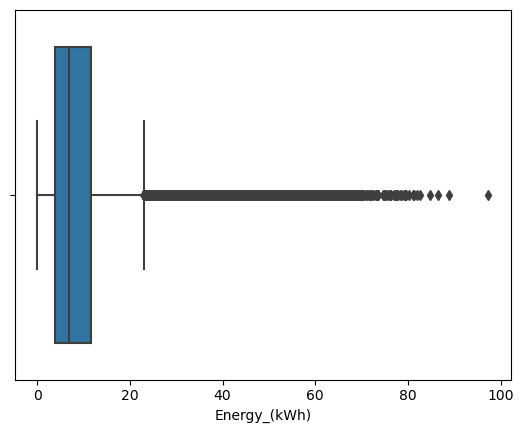

In [27]:

sns.boxplot(x=df['Energy_(kWh)']);

In [28]:
df.head().T

,0,1,2,3,4
Station_Name,PALO ALTO CA / HAMILTON #1,PALO ALTO CA / HAMILTON #1,PALO ALTO CA / HAMILTON #1,PALO ALTO CA / HAMILTON #1,PALO ALTO CA / HAMILTON #1
MAC_Address,000D:6F00:015A:9D76,000D:6F00:015A:9D76,000D:6F00:015A:9D76,000D:6F00:015A:9D76,000D:6F00:015A:9D76
Org_Name,City of Palo Alto,City of Palo Alto,City of Palo Alto,City of Palo Alto,City of Palo Alto
Start_Date,7/29/2011 20:17,7/30/2011 0:00,7/30/2011 8:16,7/30/2011 14:51,7/30/2011 18:51
Start_Time_Zone,PDT,PDT,PDT,PDT,PDT
End_Date,7/29/2011 23:20,7/30/2011 0:02,7/30/2011 12:34,7/30/2011 16:55,7/30/2011 20:03
End_Time_Zone,PDT,PDT,PDT,PDT,PDT
Transaction_Date_(Pacific_Time),7/29/2011 23:20,7/30/2011 0:02,7/30/2011 12:34,7/30/2011 16:55,7/30/2011 20:03
Total_Duration_(hh:mm:ss),3:03:32,0:02:06,4:17:32,2:03:24,1:11:24
Charging_Time_(hh:mm:ss),1:54:03,0:01:54,4:17:28,2:02:58,0:43:54


### Data Transformation

In [29]:
# Convert date and time strings to datetime objects with errors='coerce'
df.loc[:, 'Start_Date'] = pd.to_datetime(df['Start_Date'], format='%m/%d/%Y %H:%M', errors='coerce')
df.loc[:, 'End_Date'] = pd.to_datetime(df['End_Date'], format='%m/%d/%Y %H:%M', errors='coerce')

# Drop rows with missing Start_Date or End_Date
df = df.dropna(subset=['Start_Date', 'End_Date'])

# Extract time components
df['Year'] = df['Start_Date'].dt.year
df['Month'] = df['Start_Date'].dt.month
df['Day_of_Week'] = df['Start_Date'].dt.dayofweek
df['Hour'] = df['Start_Date'].dt.hour
df['Minute'] = df['Start_Date'].dt.minute

# Calculate duration and charging time using 'End_Date' and 'Start_Date'
df['Duration'] = (df['End_Date'] - df['Start_Date']).dt.total_seconds() / 3600  # Convert to hours

# Assuming you have 'Charging_Time' column in your dataset; if not, adjust accordingly
df['Charging_Time'] = (df['End_Date'] - df['Start_Date']).dt.total_seconds() / 3600  # Convert to hours

# Encode time-related features
df['Day_of_Week'] = df['Day_of_Week'].map(
    {0: 'Monday', 
     1: 'Tuesday', 
     2: 'Wednesday', 
     3: 'Thursday', 
     4: 'Friday', 
     5: 'Saturday', 
     6: 'Sunday'})

df['Month'] = df['Month'].map(
    {1: 'January', 2: 'February', 
     3: 'March', 4: 'April', 
     5: 'May', 6: 'June', 
     7: 'July', 8: 'August', 
     9: 'September', 10: 'October', 
     11: 'November', 12: 'December'})

# Save the transformed data to a new CSV file
df.to_csv('transformed_data.csv', index=False)


AttributeError: Can only use .dt accessor with datetimelike values

In [30]:
df1 = pd.read_csv("transformed_data.csv")

In [31]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249385 entries, 0 to 249384
Data columns (total 36 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   Station_Name                     249385 non-null  object 
 1   MAC_Address                      249385 non-null  object 
 2   Org_Name                         249385 non-null  object 
 3   Start_Date                       249385 non-null  object 
 4   Start_Time_Zone                  249385 non-null  object 
 5   End_Date                         249385 non-null  object 
 6   End_Time_Zone                    249385 non-null  object 
 7   Transaction_Date_(Pacific_Time)  249385 non-null  object 
 8   Total_Duration_(hh:mm:ss)        249385 non-null  object 
 9   Charging_Time_(hh:mm:ss)         249385 non-null  object 
 10  Energy_(kWh)                     249385 non-null  float64
 11  GHG_Savings_(kg)                 249385 non-null  float64
 12  Ga

In [ ]:
df.head().T

## Creating dimension tables and fact table

In [ ]:
import pandas as pd

# Read the transformed data
df = pd.read_csv('transformed_data.csv')
# Check the columns in the DataFrame
print("Columns in the DataFrame:", df.columns)

# Create the Stations dimension table
stations_df = df[['Station_Name', 'Address_1', 'City', 
                  'State/Province', 'Postal_Code', 'Country',
                  'Latitude', 'Longitude', 'Org_Name']]
stations_df['station_id'] = stations_df.index + 1
stations_df = stations_df.rename(columns={'Station_Name': 'station_name'})
stations_df.to_csv('Stations.csv', index=False)

# Create the Ports dimension table
ports_df = df[['Station_Name', 'Port_Type', 'Port_Number', 'Plug_Type']]
ports_df['station_id'] = stations_df['station_id']
ports_df['port_id'] = ports_df.index + 1
ports_df.to_csv('Ports.csv', index=False)

# Create the Dates dimension table
dates_df = df[['Transaction_Date_(Pacific_Time)', 'Start_Time_Zone']]
dates_df['date_id'] = dates_df.index + 1
dates_df['transaction_date'] = pd.to_datetime(dates_df['Transaction_Date_(Pacific_Time)'], format='%m/%d/%Y %H:%M')
dates_df = dates_df.rename(columns={'Transaction_Date_(Pacific_Time)': 'transaction_date'})
dates_df.to_csv('Dates.csv', index=False)

# Create the Users dimension table
users_df = df[['Driver_Postal_Code']]
users_df['user_id'] = users_df.index + 1
users_df.to_csv('Users.csv', index=False)

# Print the columns before the problematic line
print("Columns before the problematic line:", charging_sessions_df.columns)

# Create the Charging_Sessions fact table
charging_sessions_df = df[['Station_Name', 'Port_Number', 
                           'transaction_date', 'user_id', 
                           'Start_Date', 'End_Date', 
                           'Duration', 'Charging_Time', 
                           'Energy_(kWh)', 'GHG_Savings_(kg)', 
                           'Gasoline_Savings_(gallons)', 'Fee', 
                           'Currency', 'Ended_By', 'Plug_In_Event_Id']]
charging_sessions_df['station_id'] = stations_df['station_id']
charging_sessions_df['port_id'] = ports_df['port_id']
charging_sessions_df['date_id'] = dates_df['date_id']
charging_sessions_df['session_id'] = charging_sessions_df.index + 1
charging_sessions_df.to_csv('Charging_Sessions.csv', index=False)


In [ ]:

# Read the transformed data
df = pd.read_csv('transformed_data.csv')

# Check for duplicate station names and make them unique
duplicate_stations = df[df.duplicated('Station_Name', keep=False)]['Station_Name'].unique()
for station in duplicate_stations:
    mask = df['Station_Name'] == station
    df.loc[mask, 'Station_Name'] += '_' + df[mask].index.astype(str)

# Create the Stations dimension table
stations_df = df[['Station_Name', 'Address_1', 
                  'City', 'State/Province', 
                  'Postal_Code', 'Country', 
                  'Latitude', 'Longitude', 'Org_Name']]

stations_df['station_id'] = stations_df.index + 1
stations_df = stations_df.rename(columns={'Station_Name': 'station_name'})
stations_df.to_csv('Stations.csv', index=False)

# Create the Ports dimension table
ports_df = df[['Station_Name', 'Port_Type', 'Port_Number', 'Plug_Type']]
ports_df['station_id'] = stations_df['station_id']
ports_df['port_id'] = ports_df.index + 1
ports_df.to_csv('Ports.csv', index=False)

# Create the Dates dimension table
dates_df = df[['Transaction_Date_(Pacific_Time)', 'Start_Time_Zone']]
dates_df['date_id'] = dates_df.index + 1
dates_df['transaction_date'] = pd.to_datetime(dates_df['Transaction_Date_(Pacific_Time)'], format='%m/%d/%Y %H:%M', errors='coerce')
dates_df = dates_df.rename(columns={'Transaction_Date_(Pacific_Time)': 'transaction_date'})
dates_df.to_csv('Dates.csv', index=False)

# Create the Users dimension table
users_df = df[['Driver_Postal_Code']]
users_df['user_id'] = users_df.index + 1
users_df.to_csv('Users.csv', index=False)

# Create the Charging_Sessions fact table
charging_sessions_df = df[['Station_Name', 'Port_Number'
                           , 'Transaction_Date_(Pacific_Time)', 'Driver_Postal_Code', 
                           'Start_Date', 'End_Date', 
                           'Duration', 'Charging_Time',
                           'Energy_(kWh)', 'GHG_Savings_(kg)',
                           'Gasoline_Savings_(gallons)', 'Fee', 
                           'Currency', 'Ended_By', 'Plug_In_Event_Id']]
charging_sessions_df['station_id'] = charging_sessions_df['Station_Name'].map(stations_df.set_index('station_name')['station_id'])
charging_sessions_df['port_id'] = charging_sessions_df['Port_Number'].map(ports_df.set_index('port_id')['port_id'])
charging_sessions_df['date_id'] = pd.to_datetime(charging_sessions_df['Transaction_Date_(Pacific_Time)'], format='%m/%d/%Y %H:%M', errors='coerce').dt.date.map(dates_df.set_index('transaction_date')['date_id'])
charging_sessions_df['user_id'] = charging_sessions_df['Driver_Postal_Code'].map(users_df.set_index('Driver_Postal_Code')['user_id'])
charging_sessions_df['session_id'] = charging_sessions_df.index + 1
charging_sessions_df.to_csv('Charging_Sessions.csv', index=False)


In [ ]:

# Read the transformed data
df = pd.read_csv('transformed_data.csv')

# Check for duplicate station names and make them unique
duplicate_stations = df[df.duplicated('Station_Name', keep=False)]['Station_Name'].unique()
for station in duplicate_stations:
    mask = df['Station_Name'] == station
    df.loc[mask, 'Station_Name'] += '_' + df[mask].index.astype(str)

# Create the Stations dimension table
stations_df = df[['Station_Name', 'Address_1', 'City', 'State/Province', 'Postal_Code', 'Country', 'Latitude', 'Longitude', 'Org_Name']]
stations_df['station_id'] = stations_df.index + 1
stations_df = stations_df.rename(columns={'Station_Name': 'station_name', 'System_S/N': 'system_sn'})
stations_df.to_csv('Stations.csv', index=False)

# Create the Ports dimension table
ports_df = df[['Station_Name', 'Port_Type', 'Port_Number', 'Plug_Type', 'EVSE_ID']]
ports_df['station_id'] = stations_df['station_id']
ports_df['port_id'] = ports_df.index + 1
ports_df.to_csv('Ports.csv', index=False)

# ... (other dimension tables)

# Create the Charging_Sessions fact table
charging_sessions_df = df[['Station_Name', 'Port_Number', 'Transaction_Date_(Pacific_Time)', 'Driver_Postal_Code', 'Start_Date', 'End_Date', 'Duration', 'Charging_Time', 'Energy_(kWh)', 'GHG_Savings_(kg)', 'Gasoline_Savings_(gallons)', 'Fee', 'Currency', 'Ended_By', 'Plug_In_Event_Id']]
charging_sessions_df['station_id'] = charging_sessions_df['Station_Name'].map(stations_df.set_index('station_name')['station_id'])
charging_sessions_df['port_id'] = charging_sessions_df['Port_Number'].map(ports_df.set_index('port_id')['port_id'])
charging_sessions_df['date_id'] = pd.to_datetime(charging_sessions_df['Transaction_Date_(Pacific_Time)'], format='%m/%d/%Y %H:%M', errors='coerce').dt.date.map(dates_df.set_index('transaction_date')['date_id'])
charging_sessions_df['user_id'] = charging_sessions_df['Driver_Postal_Code'].map(users_df.set_index('Driver_Postal_Code')['user_id'])
charging_sessions_df['session_id'] = charging_sessions_df.index + 1
charging_sessions_df.to_csv('Charging_Sessions.csv', index=False)


In [ ]:


# Check if all port numbers in charging_sessions_df are present in ports_df
missing_ports = df['Port_Number'].difference(ports_df['port_id'])

if len(missing_ports) > 0:
    print(f"Missing ports: {missing_ports}")
    # Add these missing ports to the ports_df table
else:
    print("All port numbers are present in ports_df")


In [ ]:
import pandas as pd

# Read the transformed data
df = pd.read_csv('transformed_data.csv')

# Check the columns in the DataFrame
print("Columns in the DataFrame:", df.columns)

# Create the Stations dimension table
stations_df = df[['Station_Name', 'Address_1', 'City', 'State/Province', 'Postal_Code', 'Country', 'Latitude', 'Longitude', 'Org_Name']]
stations_df['station_id'] = stations_df.index + 1
stations_df = stations_df.rename(columns={'Station_Name': 'station_name'})
stations_df.to_csv('Stations.csv', index=False)

# Create the Ports dimension table
ports_df = df[['Station_Name', 'Port_Type', 'Port_Number']]
ports_df['station_id'] = stations_df['station_id']
ports_df['port_id'] = ports_df.index + 1
ports_df.to_csv('Ports.csv', index=False)

# Create the Dates dimension table
dates_df = df[['Transaction_Date_(Pacific_Time)', 'Start_Time_Zone']]
dates_df['date_id'] = dates_df.index + 1
dates_df['transaction_date'] = pd.to_datetime(dates_df['Transaction_Date_(Pacific_Time)'], format='%m/%d/%Y %H:%M')
dates_df = dates_df.rename(columns={'Transaction_Date_(Pacific_Time)': 'transaction_date'})
dates_df.to_csv('Dates.csv', index=False)

# Create the Users dimension table
users_df = df[['Driver_Postal_Code']]
users_df['user_id'] = users_df.index + 1
users_df.to_csv('Users.csv', index=False)

# Create the Charging_Sessions fact table
charging_sessions_df = df[['Station_Name', 'Port_Number', 'Transaction_Date_(Pacific_Time)', 'Driver_Postal_Code', 'Start_Date', 'End_Date', 'Duration', 'Charging_Time', 'Energy_(kWh)', 'GHG_Savings_(kg)', 'Gasoline_Savings_(gallons)', 'Fee', 'Currency', 'Ended_By', 'Plug_In_Event_Id']]

# Print the columns before the problematic line
print("Columns before the problematic line:", charging_sessions_df.columns)

# The following lines remain the same
charging_sessions_df['station_id'] = charging_sessions_df['Station_Name'].map(stations_df.set_index('station_name')['station_id'])
charging_sessions_df['port_id'] = charging_sessions_df['Port_Number'].map(ports_df.set_index('Port_Number')['port_id'])
charging_sessions_df['date_id'] = pd.to_datetime(charging_sessions_df['Transaction_Date_(Pacific_Time)'], format='%m/%d/%Y %H:%M', errors='coerce').dt.date.map(dates_df.set_index('transaction_date')['date_id'])
charging_sessions_df['user_id'] = charging_sessions_df['Driver_Postal_Code'].map(users_df.set_index('Driver_Postal_Code')['user_id'])
charging_sessions_df['session_id'] = charging_sessions_df.index + 1
charging_sessions_df.to_csv('Charging_Sessions.csv', index=False)


In [ ]:
import pandas as pd

# Read the transformed data
df = pd.read_csv('transformed_data.csv')

# Check the columns in the DataFrame
print("Columns in the DataFrame:", df.columns)

# Create the Stations dimension table
stations_df = df[['Station_Name', 'Address_1', 'City', 'State/Province', 'Postal_Code', 'Country', 'Latitude', 'Longitude', 'Org_Name']]
stations_df['station_id'] = stations_df.index + 1
stations_df = stations_df.rename(columns={'Station_Name': 'station_name'})
stations_df.to_csv('Stations.csv', index=False)

# Create the Ports dimension table
ports_df = df[['Station_Name', 'Port_Type', 'Port_Number']]
ports_df['station_id'] = stations_df['station_id']
ports_df['port_id'] = ports_df.index + 1
ports_df.to_csv('Ports.csv', index=False)

# Create the Dates dimension table
dates_df = df[['Transaction_Date_(Pacific_Time)', 'Start_Time_Zone']]
dates_df['date_id'] = dates_df.index + 1
dates_df['transaction_date'] = pd.to_datetime(dates_df['Transaction_Date_(Pacific_Time)'], format='%m/%d/%Y %H:%M')
dates_df = dates_df.rename(columns={'Transaction_Date_(Pacific_Time)': 'transaction_date'})
dates_df.to_csv('Dates.csv', index=False)

# Create the Users dimension table
users_df = df[['Driver_Postal_Code']]
users_df['user_id'] = users_df.index + 1
users_df.to_csv('Users.csv', index=False)

# Create the Charging_Sessions fact table
charging_sessions_df = df[['Station_Name', 'Port_Number', 'Transaction_Date_(Pacific_Time)', 'Driver_Postal_Code', 'Start_Date', 'End_Date', 'Duration', 'Charging_Time', 'Energy_(kWh)', 'GHG_Savings_(kg)', 'Gasoline_Savings_(gallons)', 'Fee', 'Currency', 'Ended_By', 'Plug_In_Event_Id']]

# Print the columns before the problematic line
print("Columns before the problematic line:", charging_sessions_df.columns)

# Corrected column names
charging_sessions_df['station_id'] = charging_sessions_df['Station_Name'].map(stations_df.set_index('station_name')['station_id'])
charging_sessions_df['port_id'] = charging_sessions_df['Port_Number'].map(ports_df.set_index('Port_Number')['port_id'])
charging_sessions_df['date_id'] = pd.to_datetime(charging_sessions_df['Transaction_Date_(Pacific_Time)'], format='%m/%d/%Y %H:%M', errors='coerce').dt.date.map(dates_df.set_index('transaction_date')['date_id'])
charging_sessions_df['user_id'] = charging_sessions_df['Driver_Postal_Code'].map(users_df.set_index('Driver_Postal_Code')['user_id'])
charging_sessions_df['session_id'] = charging_sessions_df.index + 1
charging_sessions_df.to_csv('Charging_Sessions.csv', index=False)


In [ ]:
import pandas as pd

# Read the transformed data
df = pd.read_csv('transformed_data.csv')

# Check the columns in the DataFrame
print("Columns in the DataFrame:", df.columns)

# Create the Stations dimension table
stations_df = df[['Station_Name', 'Address_1', 'City', 'State/Province', 'Postal_Code', 'Country', 'Latitude', 'Longitude', 'Org_Name']]
stations_df['station_id'] = stations_df.index + 1
stations_df = stations_df.rename(columns={'Station_Name': 'station_name'})
stations_df.to_csv('Stations.csv', index=False)

# Create the Ports dimension table
ports_df = df[['Station_Name', 'Port_Type', 'Port_Number', 'Plug_Type']]
ports_df['station_id'] = stations_df['station_id']
ports_df['port_id'] = ports_df.index + 1
ports_df.to_csv('Ports.csv', index=False)

# Create the Dates dimension table
dates_df = df[['Transaction_Date_(Pacific_Time)', 'Start_Time_Zone']]
dates_df['date_id'] = dates_df.index + 1
dates_df['transaction_date'] = pd.to_datetime(dates_df['Transaction_Date_(Pacific_Time)'], format='%m/%d/%Y %H:%M')
dates_df = dates_df.rename(columns={'Transaction_Date_(Pacific_Time)': 'transaction_date'})
dates_df.to_csv('Dates.csv', index=False)

# Create the Users dimension table
users_df = df[['Driver_Postal_Code']]
users_df['user_id'] = users_df.index + 1
users_df.to_csv('Users.csv', index=False)

# Create the Charging_Sessions fact table
charging_sessions_df = df[['Station_Name', 'Port_Number', 'Transaction_Date_(Pacific_Time)', 'Driver_Postal_Code', 'Start_Date', 'End_Date', 'Duration', 'Charging_Time', 'Energy_(kWh)', 'GHG_Savings_(kg)', 'Gasoline_Savings_(gallons)', 'Fee', 'Currency', 'Ended_By', 'Plug_In_Event_Id']]

# Reset the index of the DataFrames
stations_df_reset = stations_df.set_index('station_name')
ports_df_reset = ports_df.set_index('Port_Number')
dates_df_reset = dates_df.set_index('transaction_date')
users_df_reset = users_df.set_index('Driver_Postal_Code')

# Print the columns before the problematic line
print("Columns before the problematic line:", charging_sessions_df.columns)

# Corrected column names
charging_sessions_df['station_id'] = charging_sessions_df['Station_Name'].map(stations_df_reset['station_id'])
charging_sessions_df['port_id'] = charging_sessions_df['Port_Number'].map(ports_df_reset['port_id'])
charging_sessions_df['date_id'] = pd.to_datetime(charging_sessions_df['Transaction_Date_(Pacific_Time)'], format='%m/%d/%Y %H:%M', errors='coerce').dt.date.map(dates_df_reset['date_id'])
charging_sessions_df['user_id'] = charging_sessions_df['Driver_Postal_Code'].map(users_df_reset['user_id'])
charging_sessions_df['session_id'] = charging_sessions_df.index + 1
charging_sessions_df.to_csv('Charging_Sessions.csv', index=False)


In [ ]:
import pandas as pd

# Read the transformed data
df = pd.read_csv('transformed_data.csv')

# Check the columns in the DataFrame
print("Columns in the DataFrame:", df.columns)

# Create the Stations dimension table
stations_df = df[['Station_Name', 'Address_1', 'City', 'State/Province', 'Postal_Code', 'Country', 'Latitude', 'Longitude', 'Org_Name']]
stations_df['station_id'] = stations_df.index + 1
stations_df = stations_df.rename(columns={'Station_Name': 'station_name'})
stations_df.to_csv('Stations.csv', index=False)

# Create the Ports dimension table
ports_df = df[['Station_Name', 'Port_Type', 'Port_Number', 'Plug_Type']]
ports_df['station_id'] = stations_df['station_id']
ports_df['port_id'] = ports_df.index + 1
ports_df.to_csv('Ports.csv', index=False)

# Create the Dates dimension table
dates_df = df[['Transaction_Date_(Pacific_Time)', 'Start_Time_Zone']]
dates_df['date_id'] = dates_df.index + 1
dates_df['transaction_date'] = pd.to_datetime(dates_df['Transaction_Date_(Pacific_Time)'], format='%m/%d/%Y %H:%M')
dates_df = dates_df.rename(columns={'Transaction_Date_(Pacific_Time)': 'transaction_date'})
dates_df.to_csv('Dates.csv', index=False)

# Create the Users dimension table
users_df = df[['Driver_Postal_Code']]
users_df['user_id'] = users_df.index + 1
users_df.to_csv('Users.csv', index=False)

# Create the Charging_Sessions fact table
charging_sessions_df = df[['Station_Name', 'Port_Number', 'Transaction_Date_(Pacific_Time)', 'Driver_Postal_Code', 'Start_Date', 'End_Date', 'Duration', 'Charging_Time', 'Energy_(kWh)', 'GHG_Savings_(kg)', 'Gasoline_Savings_(gallons)', 'Fee', 'Currency', 'Ended_By', 'Plug_In_Event_Id']]

# Reset the index of the DataFrames
stations_df_reset = stations_df.set_index('station_name').drop_duplicates()
ports_df_reset = ports_df.set_index('Port_Number').drop_duplicates()
dates_df_reset = dates_df.set_index('transaction_date').drop_duplicates()
users_df_reset = users_df.set_index('Driver_Postal_Code').drop_duplicates()

# Print the columns before the problematic line
print("Columns before the problematic line:", charging_sessions_df.columns)

# Corrected column names
charging_sessions_df['station_id'] = charging_sessions_df['Station_Name'].map(stations_df_reset['station_id'])
charging_sessions_df['port_id'] = charging_sessions_df['Port_Number'].map(ports_df_reset['port_id'])
charging_sessions_df['date_id'] = pd.to_datetime(charging_sessions_df['Transaction_Date_(Pacific_Time)'], format='%m/%d/%Y %H:%M', errors='coerce').dt.date.map(dates_df_reset['date_id'])
charging_sessions_df['user_id'] = charging_sessions_df['Driver_Postal_Code'].map(users_df_reset['user_id'])
charging_sessions_df['session_id'] = charging_sessions_df.index + 1
charging_sessions_df.to_csv('Charging_Sessions.csv', index=False)


In [30]:
import pandas as pd

# Read the transformed data
df = pd.read_csv('transformed_data.csv')

# Create the Stations dimension table
stations_df = df[['Station_Name', 'Address_1', 'City', 'State/Province', 'Postal_Code', 'Country', 'Latitude', 'Longitude', 'Org_Name']]
stations_df['station_id'] = stations_df.index + 1
stations_df = stations_df.rename(columns={'Station_Name': 'station_name'})
stations_dim = stations_df[['station_id', 'station_name', 'Address_1', 'City', 'State/Province', 'Postal_Code', 'Country', 'Latitude', 'Longitude', 'Org_Name']]
stations_dim.to_csv('Stations.csv', index=False)

# Create the Ports dimension table
ports_df = df[['Station_Name', 'Port_Type', 'Port_Number', 'Plug_Type']]
ports_df['station_id'] = stations_df['station_id']
ports_df['port_id'] = ports_df.index + 1
ports_dim = ports_df[['port_id', 'station_id', 'Port_Type', 'Port_Number', 'Plug_Type']]
ports_dim.to_csv('Ports.csv', index=False)

# Create the Dates dimension table
dates_df = df[['Transaction_Date_(Pacific_Time)', 'Start_Time_Zone']]
dates_df['date_id'] = dates_df.index + 1
dates_df['transaction_date'] = pd.to_datetime(dates_df['Transaction_Date_(Pacific_Time)'], format='%m/%d/%Y %H:%M')
dates_dim = dates_df[['date_id', 'transaction_date', 'Start_Time_Zone']]
dates_dim.to_csv('Dates.csv', index=False)

# Create the Users dimension table
users_df = df[['Driver_Postal_Code']]
users_df['user_id'] = users_df.index + 1
users_dim = users_df.rename(columns={'Driver_Postal_Code': 'driver_postal_code'})
users_dim.to_csv('Users.csv', index=False)

# Create the Charging_Sessions fact table
charging_sessions_df = df[['Station_Name', 'Port_Number', 'Transaction_Date_(Pacific_Time)', 'Driver_Postal_Code', 'Start_Date', 'End_Date', 'Duration', 'Charging_Time', 'Energy_(kWh)', 'GHG_Savings_(kg)', 'Gasoline_Savings_(gallons)', 'Fee', 'Currency', 'Ended_By', 'Plug_In_Event_Id']]
charging_sessions_df['station_id'] = charging_sessions_df['Station_Name'].map(stations_dim.set_index('station_name')['station_id'])
charging_sessions_df['port_id'] = charging_sessions_df['Port_Number'].map(ports_dim.set_index('Port_Number')['port_id'])
charging_sessions_df['date_id'] = pd.to_datetime(charging_sessions_df['Transaction_Date_(Pacific_Time)'], format='%m/%d/%Y %H:%M', errors='coerce').dt.date.map(dates_dim.set_index('transaction_date')['date_id'])
charging_sessions_df['user_id'] = charging_sessions_df['Driver_Postal_Code'].map(users_dim.set_index('driver_postal_code')['user_id'])
charging_sessions_fact = charging_sessions_df[['station_id', 'port_id', 'date_id', 'user_id', 'Start_Date', 'End_Date', 'Duration', 'Charging_Time', 'Energy_(kWh)', 'GHG_Savings_(kg)', 'Gasoline_Savings_(gallons)', 'Fee', 'Currency', 'Ended_By', 'Plug_In_Event_Id']]
charging_sessions_fact['session_id'] = charging_sessions_fact.index + 1
charging_sessions_fact.to_csv('Charging_Sessions.csv', index=False)


C:\Users\Sanjay.k\AppData\Local\Temp\ipykernel_2452\1673698826.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stations_df['station_id'] = stations_df.index + 1
C:\Users\Sanjay.k\AppData\Local\Temp\ipykernel_2452\1673698826.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ports_df['station_id'] = stations_df['station_id']
C:\Users\Sanjay.k\AppData\Local\Temp\ipykernel_2452\1673698826.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

InvalidIndexError: Reindexing only valid with uniquely valued Index objects

In [ ]:
import pandas as pd

# Read the transformed data
df = pd.read_csv('transformed_data.csv')

# Stations Dimension Table
stations_dim = df[['Station_Name', 'Address_1', 'City', 'State/Province', 'Postal_Code', 'Country', 'Latitude', 'Longitude', 'Org_Name']]
stations_dim['station_id'] = range(1, len(stations_dim) + 1)
stations_dim = stations_dim.rename(columns={'Station_Name': 'station_name'})
stations_dim_reset = stations_dim.reset_index(drop=True)  # Resetting index
stations_dim_reset.to_csv('Stations.csv', index=False)

# Ports Dimension Table
ports_dim = df[['Station_Name', 'Port_Type', 'Port_Number', 'Plug_Type']]
ports_dim['station_id'] = stations_dim_reset['station_id']
ports_dim['port_id'] = range(1, len(ports_dim) + 1)
ports_dim_reset = ports_dim.reset_index(drop=True)  # Resetting index
ports_dim_reset.to_csv('Ports.csv', index=False)

# Dates Dimension Table
dates_dim = df[['Transaction_Date_(Pacific_Time)', 'Start_Time_Zone']]
dates_dim['date_id'] = range(1, len(dates_dim) + 1)
dates_dim['transaction_date'] = pd.to_datetime(dates_dim['Transaction_Date_(Pacific_Time)'], format='%m/%d/%Y %H:%M')
dates_dim_reset = dates_dim.reset_index(drop=True)  # Resetting index
dates_dim_reset.to_csv('Dates.csv', index=False)

# Users Dimension Table
users_dim = df[['Driver_Postal_Code']]
users_dim['user_id'] = range(1, len(users_dim) + 1)
users_dim = users_dim.rename(columns={'Driver_Postal_Code': 'driver_postal_code'})
users_dim_reset = users_dim.reset_index(drop=True)  # Resetting index
users_dim_reset.to_csv('Users.csv', index=False)

# Charging Sessions Fact Table
charging_sessions_fact = df[['Station_Name', 'Port_Number', 'Transaction_Date_(Pacific_Time)', 'Driver_Postal_Code', 'Start_Date', 'End_Date', 'Duration', 'Charging_Time', 'Energy_(kWh)', 'GHG_Savings_(kg)', 'Gasoline_Savings_(gallons)', 'Fee', 'Currency', 'Ended_By', 'Plug_In_Event_Id']]
charging_sessions_fact['station_id'] = charging_sessions_fact['Station_Name'].map(stations_dim_reset.set_index('station_name')['station_id'])
charging_sessions_fact['port_id'] = charging_sessions_fact['Port_Number'].map(ports_dim_reset.set_index('Port_Number')['port_id'])
charging_sessions_fact['date_id'] = pd.to_datetime(charging_sessions_fact['Transaction_Date_(Pacific_Time)'], format='%m/%d/%Y %H:%M', errors='coerce').dt.date.map(dates_dim_reset.set_index('transaction_date')['date_id'])
charging_sessions_fact['user_id'] = charging_sessions_fact['Driver_Postal_Code'].map(users_dim_reset.set_index('driver_postal_code')['user_id'])
charging_sessions_fact['session_id'] = range(1, len(charging_sessions_fact) + 1)
charging_sessions_fact.to_csv('Charging_Sessions.csv', index=False)


In [ ]:

import pandas as pd

# Read the transformed data
df = pd.read_csv('transformed_data.csv')

# Stations Dimension Table
stations_dim = df[['Station_Name', 'Address_1', 'City', 'State/Province', 'Postal_Code', 'Country', 'Latitude', 'Longitude', 'Org_Name']].copy()
stations_dim['station_id'] = range(1, len(stations_dim) + 1)
stations_dim = stations_dim.rename(columns={'Station_Name': 'station_name'})
stations_dim_reset = stations_dim.reset_index(drop=True)  # Resetting index
stations_dim_reset.to_csv('Stations.csv', index=False)

# Ports Dimension Table
ports_dim = df[['Station_Name', 'Port_Type', 'Port_Number', 'Plug_Type']].copy()
ports_dim['station_id'] = stations_dim_reset['station_id']
ports_dim['port_id'] = range(1, len(ports_dim) + 1)
ports_dim_reset = ports_dim.reset_index(drop=True)  # Resetting index
ports_dim_reset.to_csv('Ports.csv', index=False)

# Dates Dimension Table
dates_dim = df[['Transaction_Date_(Pacific_Time)', 'Start_Time_Zone']].copy()
dates_dim['date_id'] = range(1, len(dates_dim) + 1)
dates_dim['transaction_date'] = pd.to_datetime(dates_dim['Transaction_Date_(Pacific_Time)'], format='%m/%d/%Y %H:%M')
dates_dim_reset = dates_dim.reset_index(drop=True)  # Resetting index
dates_dim_reset.to_csv('Dates.csv', index=False)

# Users Dimension Table
users_dim = df[['Driver_Postal_Code']].copy()
users_dim['user_id'] = range(1, len(users_dim) + 1)
users_dim = users_dim.rename(columns={'Driver_Postal_Code': 'driver_postal_code'})
users_dim_reset = users_dim.reset_index(drop=True)  # Resetting index
users_dim_reset.to_csv('Users.csv', index=False)

# Fact Table: Charging Sessions
charging_sessions_fact = df[['Station_Name', 'Port_Number', 'Transaction_Date_(Pacific_Time)', 'Driver_Postal_Code', 'Start_Date', 'End_Date', 'Duration', 'Charging_Time', 'Energy_(kWh)', 'GHG_Savings_(kg)', 'Gasoline_Savings_(gallons)', 'Fee', 'Currency', 'Ended_By', 'Plug_In_Event_Id']].copy()
charging_sessions_fact['station_id'] = charging_sessions_fact['Station_Name'].map(stations_dim_reset.set_index('station_name')['station_id'])
charging_sessions_fact['port_id'] = charging_sessions_fact['Port_Number'].map(ports_dim_reset.set_index('Port_Number')['port_id'])
charging_sessions_fact['date_id'] = pd.to_datetime(charging_sessions_fact['Transaction_Date_(Pacific_Time)'], format='%m/%d/%Y %H:%M', errors='coerce').dt.date.map(dates_dim_reset.set_index('transaction_date')['date_id'])
charging_sessions_fact['user_id'] = charging_sessions_fact['Driver_Postal_Code'].map(users_dim_reset.set_index('driver_postal_code')['user_id'])
charging_sessions_fact['session_id'] = range(1, len(charging_sessions_fact) + 1)
charging_sessions_fact.to_csv('Charging_Sessions.csv', index=False)


In [ ]:
import pandas as pd

# Read the transformed data
df = pd.read_csv('transformed_data.csv')

# Stations Dimension Table
stations_dim = df[['Station_Name', 'Address_1', 'City', 'State/Province', 'Postal_Code', 'Country', 'Latitude', 'Longitude', 'Org_Name']].copy()
stations_dim['station_id'] = range(1, len(stations_dim) + 1)
stations_dim = stations_dim.rename(columns={'Station_Name': 'station_name'})
stations_dim_reset = stations_dim.drop_duplicates(subset='station_name').reset_index(drop=True)  # Resetting index
stations_dim_reset.to_csv('Stations.csv', index=False)

# Ports Dimension Table
ports_dim = df[['Station_Name', 'Port_Type', 'Port_Number', 'Plug_Type']].copy()
ports_dim['station_id'] = stations_dim_reset['station_id']
ports_dim['port_id'] = range(1, len(ports_dim) + 1)
ports_dim_reset = ports_dim.drop_duplicates(subset='Port_Number').reset_index(drop=True)  # Resetting index
ports_dim_reset.to_csv('Ports.csv', index=False)

# Dates Dimension Table
dates_dim = df[['Transaction_Date_(Pacific_Time)', 'Start_Time_Zone']].copy()
dates_dim['date_id'] = range(1, len(dates_dim) + 1)
dates_dim['transaction_date'] = pd.to_datetime(dates_dim['Transaction_Date_(Pacific_Time)'], format='%m/%d/%Y %H:%M')
dates_dim_reset = dates_dim.drop_duplicates(subset='transaction_date').reset_index(drop=True)  # Resetting index
dates_dim_reset.to_csv('Dates.csv', index=False)

# Users Dimension Table
users_dim = df[['Driver_Postal_Code']].copy()
users_dim['user_id'] = range(1, len(users_dim) + 1)
users_dim = users_dim.rename(columns={'Driver_Postal_Code': 'driver_postal_code'})
users_dim_reset = users_dim.drop_duplicates(subset='driver_postal_code').reset_index(drop=True)  # Resetting index
users_dim_reset.to_csv('Users.csv', index=False)

# Fact Table: Charging Sessions
charging_sessions_fact = df[['Station_Name', 'Port_Number', 'Transaction_Date_(Pacific_Time)', 'Driver_Postal_Code', 'Start_Date', 'End_Date', 'Duration', 'Charging_Time', 'Energy_(kWh)', 'GHG_Savings_(kg)', 'Gasoline_Savings_(gallons)', 'Fee', 'Currency', 'Ended_By', 'Plug_In_Event_Id']].copy()
charging_sessions_fact['station_id'] = charging_sessions_fact['Station_Name'].map(stations_dim_reset.set_index('station_name')['station_id'])
charging_sessions_fact['port_id'] = charging_sessions_fact['Port_Number'].map(ports_dim_reset.set_index('Port_Number')['port_id'])
charging_sessions_fact['date_id'] = pd.to_datetime(charging_sessions_fact['Transaction_Date_(Pacific_Time)'], format='%m/%d/%Y %H:%M', errors='coerce').dt.date.map(dates_dim_reset.set_index('transaction_date')['date_id'])
charging_sessions_fact['user_id'] = charging_sessions_fact['Driver_Postal_Code'].map(users_dim_reset.set_index('driver_postal_code')['user_id'])
charging_sessions_fact['session_id'] = range(1, len(charging_sessions_fact) + 1)
charging_sessions_fact.to_csv('Charging_Sessions.csv', index=False)


In [ ]:
charging_session_df = pd.read_csv("Charging_Sessions.csv",low_memory=False)

In [ ]:
charging_session_df.head()


In [31]:

import pandas as pd

# Read the transformed data
df = pd.read_csv('transformed_data.csv')

# Stations Dimension Table
stations_dim = df[['Station_Name', 'Address_1', 'City', 'State/Province', 'Postal_Code', 'Country', 'Latitude', 'Longitude', 'Org_Name']].copy()
stations_dim.insert(0, 'station_id', range(1, len(stations_dim) + 1))
stations_dim = stations_dim.rename(columns={'Station_Name': 'station_name'})
stations_dim_reset = stations_dim.drop_duplicates(subset='station_name').reset_index(drop=True)  # Resetting index
stations_dim_reset.to_csv('Stations.csv', index=False)

# Ports Dimension Table
ports_dim = df[['Station_Name', 'Port_Type', 'Port_Number', 'Plug_Type']].copy()
ports_dim.insert(0, 'port_id', range(1, len(ports_dim) + 1))
ports_dim['station_id'] = stations_dim_reset['station_id']
ports_dim_reset = ports_dim.drop_duplicates(subset='Port_Number').reset_index(drop=True)  # Resetting index
ports_dim_reset.to_csv('Ports.csv', index=False)

# Dates Dimension Table
dates_dim = df[['Transaction_Date_(Pacific_Time)', 'Start_Time_Zone']].copy()
dates_dim.insert(0, 'date_id', range(1, len(dates_dim) + 1))
dates_dim['transaction_date'] = pd.to_datetime(dates_dim['Transaction_Date_(Pacific_Time)'], format='%m/%d/%Y %H:%M')
dates_dim_reset = dates_dim.drop_duplicates(subset='transaction_date').reset_index(drop=True)  # Resetting index
dates_dim_reset.to_csv('Dates.csv', index=False)

# Users Dimension Table
users_dim = df[['Driver_Postal_Code']].copy()
users_dim.insert(0, 'user_id', range(1, len(users_dim) + 1))
users_dim = users_dim.rename(columns={'Driver_Postal_Code': 'driver_postal_code'})
users_dim_reset = users_dim.drop_duplicates(subset='driver_postal_code').reset_index(drop=True)  # Resetting index
users_dim_reset.to_csv('Users.csv', index=False)

# Fact Table: Charging Sessions
charging_sessions_fact = df[['Station_Name', 'Port_Number', 'Transaction_Date_(Pacific_Time)', 'Driver_Postal_Code', 'Start_Date', 'End_Date', 'Duration', 'Charging_Time', 'Energy_(kWh)', 'GHG_Savings_(kg)', 'Gasoline_Savings_(gallons)', 'Fee', 'Currency', 'Ended_By', 'Plug_In_Event_Id']].copy()
charging_sessions_fact.insert(0, 'session_id', range(1, len(charging_sessions_fact) + 1))
charging_sessions_fact['station_id'] = charging_sessions_fact['Station_Name'].map(stations_dim_reset.set_index('station_name')['station_id'])
charging_sessions_fact['port_id'] = charging_sessions_fact['Port_Number'].map(ports_dim_reset.set_index('Port_Number')['port_id'])
charging_sessions_fact['date_id'] = pd.to_datetime(charging_sessions_fact['Transaction_Date_(Pacific_Time)'], format='%m/%d/%Y %H:%M', errors='coerce').dt.date.map(dates_dim_reset.set_index('transaction_date')['date_id'])
charging_sessions_fact['user_id'] = charging_sessions_fact['Driver_Postal_Code'].map(users_dim_reset.set_index('driver_postal_code')['user_id'])
charging_sessions_fact.to_csv('Charging_Sessions.csv', index=False)


In [33]:
import pandas as pd

# Read the transformed data
df = pd.read_csv("transformed_data.csv")

# Define function to map station names efficiently
def map_station_name(station_name, station_dim):
    return station_dim.loc[station_dim["station_name"] == station_name, "station_id"].values[0]

# Stations Dimension Table
stations_dim = df[
    [
        "Station_Name",
        "Address_1",
        "City",
        "State/Province",
        "Postal_Code",
        "Country",
        "Latitude",
        "Longitude",
        "Org_Name",
    ]
].copy()
stations_dim.insert(0, "station_id", range(1, len(stations_dim) + 1))
stations_dim.rename(columns={"Station_Name": "station_name"}, inplace=True)
stations_dim_reset = stations_dim.drop_duplicates(subset="station_name").reset_index(drop=True)

# Ports Dimension Table
ports_dim = df[
    ["Station_Name", "Port_Type", "Port_Number", "Plug_Type"]
].copy()
ports_dim.insert(0, "port_id", range(1, len(ports_dim) + 1))
ports_dim["station_id"] = ports_dim["Station_Name"].apply(lambda name: map_station_name(name, stations_dim_reset))
ports_dim_reset = ports_dim.drop_duplicates(subset="Port_Number").reset_index(drop=True)

# Users Dimension Table
users_dim = df[["Driver_Postal_Code"]].copy()
users_dim.insert(0, "user_id", range(1, len(users_dim) + 1))
users_dim.rename(columns={"Driver_Postal_Code": "driver_postal_code"}, inplace=True)
users_dim_reset = users_dim.drop_duplicates(subset="driver_postal_code").reset_index(drop=True)

# Dates Dimension Table
dates_dim = df[["Transaction_Date_(Pacific_Time)", "Start_Time_Zone"]].copy()
dates_dim.insert(0, "date_id", range(1, len(dates_dim) + 1))
dates_dim["transaction_date"] = pd.to_datetime(dates_dim["Transaction_Date_(Pacific_Time)"], format="%m/%d/%Y %H:%M")
invalid_dates = dates_dim[dates_dim["transaction_date"].isna()]["Transaction_Date_(Pacific_Time)"].tolist()
if invalid_dates:
    print(f"Warning: Found invalid dates: {invalid_dates}")
    # Handle invalid dates here (e.g., drop rows, replace with specific value)
dates_dim_reset = dates_dim.drop_duplicates(subset="transaction_date").reset_index(drop=True)

# Fact Table: Charging Sessions
charging_sessions_fact = df[
    [
        "Station_Name",
        "Port_Number",
        "Transaction_Date_(Pacific_Time)",
        "Driver_Postal_Code",
        "Start_Date",
        "End_Date",
        "Duration",
        "Charging_Time",
        "Energy_(kWh)",
        "GHG_Savings_(kg)",
        "Gasoline_Savings_(gallons)",
        "Fee",
        "Currency",
        "Ended_By",
        "Plug_In_Event_Id",
    ]
].copy()
charging_sessions_fact.insert(0, "session_id", range(1, len(charging_sessions_fact) + 1))
charging_sessions_fact["station_id"] = charging_sessions_fact["Station_Name"].apply(lambda name: map_station_name(name, stations_dim_reset))
charging_sessions_fact["port_id"] = ports_dim_reset.set_index("Port_Number")["port_id"]
charging_sessions_fact["date_id"] = dates_dim_reset.set_index("transaction_date")["date_id"]
charging_sessions_fact["user_id"] = users_dim_reset.set_index("driver_postal_code")["user_id"]

# Export data to CSV files
# stations_dim_reset.to_csv("Stations.csv", index=False


In [34]:
ports_dim.head()

,port_id,Station_Name,Port_Type,Port_Number,Plug_Type,station_id
0,1,PALO ALTO CA / HAMILTON #1,Level 2,2,J1772,1
1,2,PALO ALTO CA / HAMILTON #1,Level 2,2,J1772,1
2,3,PALO ALTO CA / HAMILTON #1,Level 2,2,J1772,1
3,4,PALO ALTO CA / HAMILTON #1,Level 2,2,J1772,1
4,5,PALO ALTO CA / HAMILTON #1,Level 2,2,J1772,1


In [35]:
users_dim.head()

,user_id,driver_postal_code
0,1,95124.0
1,2,94301.0
2,3,94301.0
3,4,94302.0
4,5,94043.0


In [36]:
dates_dim.head()

,date_id,Transaction_Date_(Pacific_Time),Start_Time_Zone,transaction_date
0,1,7/29/2011 23:20,PDT,2011-07-29 23:20:00
1,2,7/30/2011 0:02,PDT,2011-07-30 00:02:00
2,3,7/30/2011 12:34,PDT,2011-07-30 12:34:00
3,4,7/30/2011 16:55,PDT,2011-07-30 16:55:00
4,5,7/30/2011 20:03,PDT,2011-07-30 20:03:00


In [37]:
charging_sessions_fact.head()

,session_id,Station_Name,Port_Number,Transaction_Date_(Pacific_Time),Driver_Postal_Code,Start_Date,End_Date,Duration,Charging_Time,Energy_(kWh),GHG_Savings_(kg),Gasoline_Savings_(gallons),Fee,Currency,Ended_By,Plug_In_Event_Id,station_id,port_id,date_id,user_id
0,1,PALO ALTO CA / HAMILTON #1,2,7/29/2011 23:20,95124.0,2011-07-29 20:17:00,2011-07-29 23:20:00,3.050000,3.050000,6.249457,2.625,0.784,0.0,USD,Plug Out at Vehicle,3,1,NaN,NaN,NaN
1,2,PALO ALTO CA / HAMILTON #1,2,7/30/2011 0:02,94301.0,2011-07-30 00:00:00,2011-07-30 00:02:00,0.033333,0.033333,0.106588,0.045,0.013,0.0,USD,Customer,4,1,64.0,NaN,NaN
2,3,PALO ALTO CA / HAMILTON #1,2,7/30/2011 12:34,94301.0,2011-07-30 08:16:00,2011-07-30 12:34:00,4.300000,4.300000,14.951777,6.280,1.876,0.0,USD,Plug Out at Vehicle,5,1,1.0,NaN,NaN
3,4,PALO ALTO CA / HAMILTON #1,2,7/30/2011 16:55,94302.0,2011-07-30 14:51:00,2011-07-30 16:55:00,2.066667,2.066667,7.159643,3.007,0.899,0.0,USD,Customer,6,1,NaN,NaN,NaN
4,5,PALO ALTO CA / HAMILTON #1,2,7/30/2011 20:03,94043.0,2011-07-30 18:51:00,2011-07-30 20:03:00,1.200000,1.200000,1.957765,0.822,0.246,0.0,USD,Plug Out at Vehicle,7,1,NaN,NaN,NaN


In [41]:
import pandas as pd

# Read the transformed data
df = pd.read_csv("transformed_data.csv")

# Define function to map station names efficiently
def map_station_name(station_name, station_dim):
    return station_dim.loc[station_dim["station_name"] == station_name, "station_id"].values[0]

# Stations Dimension Table
stations_dim = df[
    [
        "Station_Name",
        "Address_1",
        "City",
        "State/Province",
        "Postal_Code",
        "Country",
        "Latitude",
        "Longitude",
        "Org_Name",
    ]
].copy()
stations_dim.insert(0, "station_id", range(1, len(stations_dim) + 1))
stations_dim.rename(columns={"Station_Name": "station_name"}, inplace=True)
stations_dim_reset = stations_dim.drop_duplicates(subset="station_name").reset_index(drop=True)

# Ports Dimension Table
ports_dim = df[
    ["Station_Name", "Port_Type", "Port_Number", "Plug_Type"]
].copy()
ports_dim.insert(0, "port_id", range(1, len(ports_dim) + 1))
ports_dim["station_id"] = ports_dim["Station_Name"].apply(lambda name: map_station_name(name, stations_dim_reset))
ports_dim_reset = ports_dim.drop_duplicates(subset="Port_Number").reset_index(drop=True)

# Users Dimension Table
users_dim = df[["Driver_Postal_Code"]].copy()
users_dim.insert(0, "user_id", range(1, len(users_dim) + 1))
users_dim.rename(columns={"Driver_Postal_Code": "driver_postal_code"}, inplace=True)
users_dim_reset = users_dim.drop_duplicates(subset="driver_postal_code").reset_index(drop=True)

# Dates Dimension Table
dates_dim = df[["Transaction_Date_(Pacific_Time)", "Start_Time_Zone"]].copy()
dates_dim.insert(0, "date_id", range(1, len(dates_dim) + 1))
dates_dim["transaction_date"] = pd.to_datetime(dates_dim["Transaction_Date_(Pacific_Time)"], format="%m/%d/%Y %H:%M")
invalid_dates = dates_dim[dates_dim["transaction_date"].isna()]["Transaction_Date_(Pacific_Time)"].tolist()
if invalid_dates:
    print(f"Warning: Found invalid dates: {invalid_dates}")
    # Handle invalid dates here (e.g., drop rows, replace with specific value)

dates_dim['year'] = dates_dim['transaction_date'].dt.year
dates_dim['month'] = dates_dim['transaction_date'].dt.month
dates_dim['hour'] = dates_dim['transaction_date'].dt.hour
dates_dim['weekday'] = dates_dim['transaction_date'].dt.weekday

dates_dim_reset = dates_dim.drop_duplicates(subset="transaction_date").reset_index(drop=True)

# Fact Table: Charging Sessions
charging_sessions_fact = df[
    [
        "Station_Name",
        "Port_Number",
        "Transaction_Date_(Pacific_Time)",
        "Driver_Postal_Code",
        "Start_Date",
        "End_Date",
        "Duration",
        "Charging_Time",
        "Energy_(kWh)",
        "GHG_Savings_(kg)",
        "Gasoline_Savings_(gallons)",
        "Fee",
        "Currency",
        "Ended_By",
        "Plug_In_Event_Id",
    ]
].copy()
charging_sessions_fact.insert(0, "session_id", range(1, len(charging_sessions_fact) + 1))
charging_sessions_fact["station_id"] = charging_sessions_fact["Station_Name"].apply(lambda name: map_station_name(name, stations_dim_reset))
charging_sessions_fact["port_id"] = ports_dim_reset.set_index("Port_Number")["port_id"]

charging_sessions_fact["date_id"] = dates_dim_reset.set_index("transaction_date")["date_id"]
charging_sessions_fact["user_id"] = users_dim_reset.set_index("driver_postal_code")["user_id"]

charging_sessions_fact['year'] = charging_sessions_fact['Transaction_Date_(Pacific_Time)'].dt.year
charging_sessions_fact['month'] = charging_sessions_fact['Transaction_Date_(Pacific_Time)'].dt.month
charging_sessions_fact['hour'] = charging_sessions_fact['Transaction_Date_(Pacific_Time)'].dt.hour
charging_sessions_fact['weekday'] = charging_sessions_fact['Transaction_Date_(Pacific_Time)'].dt.weekday

# Export data to CSV files
stations_dim_reset.to_csv("Stations1.csv", index=False)
ports_dim_reset.to_csv("Ports1.csv", index=False)
users_dim_reset.to_csv("Users1.csv", index=False)
dates_dim_reset.to_csv("Dates1.csv", index=False)
charging_sessions_fact.to_csv("Charging_Sessions1.csv", index=False)

print("Data successfully exported!")


AttributeError: Can only use .dt accessor with datetimelike values

In [48]:
import pandas as pd

# Define function to map station names efficiently
def map_station_name(station_name, station_dim):
    return station_dim.loc[station_dim["station_name"] == station_name, "station_id"].values[0]

# Read the transformed data
df = pd.read_csv("transformed_data.csv")

# Stations Dimension Table
stations_dim = df[
    [
        "Station_Name",
        "Address_1",
        "City",
        "State/Province",
        "Postal_Code",
        "Country",
        "Latitude",
        "Longitude",
        "Org_Name",
    ]
].copy()
stations_dim.insert(0, "station_id", range(1, len(stations_dim) + 1))
stations_dim.rename(columns={"Station_Name": "station_name"}, inplace=True)
stations_dim_reset = stations_dim.drop_duplicates(subset="station_name").reset_index(drop=True)

# Ports Dimension Table
ports_dim = df[
    ["Station_Name", "Port_Type", "Port_Number", "Plug_Type"]
].copy()
ports_dim.insert(0, "port_id", range(1, len(ports_dim) + 1))
ports_dim["station_id"] = ports_dim["Station_Name"].apply(lambda name: map_station_name(name, stations_dim_reset))
ports_dim_reset = ports_dim.drop_duplicates(subset="Port_Number").reset_index(drop=True)

# Users Dimension Table
users_dim = df[["Driver_Postal_Code"]].copy()
users_dim.insert(0, "user_id", range(1, len(users_dim) + 1))
users_dim.rename(columns={"Driver_Postal_Code": "driver_postal_code"}, inplace=True)
users_dim_reset = users_dim.drop_duplicates(subset="driver_postal_code").reset_index(drop=True)

# Dates Dimension Table
dates_dim = df[["Transaction_Date_(Pacific_Time)", "Start_Time_Zone", "Year", "Month", "Hour","Minute" ,"Day_of_Week"]].copy()
dates_dim.insert(0, "date_id", range(1, len(dates_dim) + 1))
dates_dim["transaction_date"] = pd.to_datetime(dates_dim["Transaction_Date_(Pacific_Time)"], format="%m/%d/%Y %H:%M")

invalid_dates = dates_dim[dates_dim["transaction_date"].isna()]["Transaction_Date_(Pacific_Time)"].tolist()
if invalid_dates:
    print(f"Warning: Found invalid dates: {invalid_dates}")
    # Handle invalid dates here (e.g., drop rows, replace with a specific value)

dates_dim_reset = dates_dim.drop_duplicates(subset="transaction_date").reset_index(drop=True)

# Fact Table: Charging Sessions
charging_sessions_fact = df.copy()
charging_sessions_fact.insert(0, "session_id", range(1, len(charging_sessions_fact) + 1))
charging_sessions_fact["station_id"] = charging_sessions_fact["Station_Name"].apply(lambda name: map_station_name(name, stations_dim_reset))
charging_sessions_fact["port_id"] = ports_dim_reset.set_index("Port_Number")["port_id"]
charging_sessions_fact["date_id"] = dates_dim_reset.set_index("transaction_date")["date_id"]
charging_sessions_fact["user_id"] = users_dim_reset.set_index("driver_postal_code")["user_id"]



# Export data to CSV files
stations_dim_reset.to_csv("Stations1.csv", index=False)
ports_dim_reset.to_csv("Ports1.csv", index=False)
users_dim_reset.to_csv("Users1.csv",index=False)
dates_dim_reset.to_csv("Dates1.csv", index=False)
charging_sessions_fact.to_csv("Charging_Sessions1.csv", index=False)

print("Data successfully exported!")





Data successfully exported!
